<a href="https://colab.research.google.com/github/csantos2435/Project_Medicine/blob/main/Pr%C3%A9_Processamento_PI_6dsm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pré-Processamento PI - 6° Semestre**

---


**Integrantes do Grupo:**
* Camilli Ramos dos Santos
* Ana Beatriz dos Santos
* Moisés Verissimo de Souza

**Link base consumida:**

 https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning


**Informações Base de Dados**
* **Descrição:** Disease Prediction Using Machine Learning (Previsão de Doenças)
* **Quantidade de atributos:** 133
* **Quantidade de registros:** 4920
* **Doenças Previstas(Classe):** 42
* **Breve descrição:**
Um conjunto de dados com intuito de fornecer o diagnótico de uma possível doença, caso a mesma possua sintomas de uma doença específica ou esteja saudável, a base de dados usará os sintomas informado pelo paciente afim de prever o diagósntico.

  Para esta conclusão são fornecidos 133 tipos de sintomas(atributos) com valores igual a: **1** - (Possui sintoma) / **0** - (Não possui sintoma)
  
  Logo, deve ser fornecido pelo paciente conforme suas dores.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importando bibliotecas e a base de dados que será consumida


In [ ]:
# IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

# IMPORTANDO ARQUIVO
df = pd.read_csv('/content/drive/My Drive/PI - 6 DSM/Training.csv', sep=',')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


## **Estrutura da Base de Dados**

* ### **Criando Base de Dados Diversa**

 O conjunto de dados selecionado para o aprendizado de máquina apresentava uma distribuição equilibrada entre as classes, com 120 exemplos para cada uma delas. Após a implementação do algoritmo e a análise da taxa de acerto, observou-se que o modelo obteve 100% de acertos. Esse resultado indicava que o algoritmo havia decorado os dados, em vez de generalizar a partir deles.

 Diante disso, optou-se por realizar um sorteio aleatório dos registros no banco de dados, criando um novo conjunto de dados com uma distribuição mais variada entre as classes. Essa abordagem visa promover um aprendizado mais robusto e evitar que o modelo se limite à memorização dos dados.

In [ ]:
#REALIZA UM SORTEIO DOS REGISTROS E SALVA EM UMA NOVA BASE
dfNovo = df.sample(2345, random_state=1)

# SALVA APENAS OS REGISTROS SORTEADOS NO ARQUIVO DE SAÍDA
dfNovo.to_csv('/content/drive/My Drive/PI - 6 DSM/TrainingDrawn.csv', index=False)

# IMPORTANDO ARQUIVO COM REGISTROS SORTEADOS
df = pd.read_csv('/content/drive/My Drive/PI - 6 DSM/TrainingDrawn.csv', sep=',')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Gastroenteritis,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Hypothyroidism,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Chicken pox,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cervical spondylosis,NaN


* ### **Contagem de Linhas e Colunas.**

  Contagem de linhas (Registros cadastrados) e colunas (Variáveis)

In [ ]:
# SABER O TAMANHO DA BASE DE DADOS (LINHAS, COLUNAS)
df.shape

(2345, 134)

* ### **Alteração dos nomes das colunas.**

  Foi realizada a tradução dos nomes das variáves e a remoção dos espaços vazios entre as palavras.
  Para este passo foi usado a função columns para pegar os nomes das colunas da base de dados, e em seguida alterar as descrições que possuem espaço ou traço para o caracter eunderline (_).
  
  Optamos por realizar esta alteração devido a criação da API futuramente, logo com esta alteração o uso dela será mais agil.

In [ ]:
# ALTERAÇÃO NOME DAS COLUNAS E TRADUÇÃO
new_column_trad = {
    "itching": "coceira",
    "skin_rash": "erupcao cutanea",
    "nodal_skin_eruptions": "erupcoes cutaneas nodais",
    "continuous_sneezing": "espirros continuos",
    "shivering": "tremores",
    "chills": "calafrios",
    "joint_pain": "dor nas articulacoes",
    "stomach_pain": "dor de estomago",
    "acidity": "acidez",
    "ulcers_on_tongue": "ulceras na lingua",
    "muscle_wasting": "perda de massa muscular",
    "vomiting": "vomito",
    "burning_micturition": "queimacao ao urinar",
    "spotting_urination": "manchas ao urinar",
    "fatigue": "fadiga",
    "weight_gain": "ganho de peso",
    "anxiety": "ansiedade",
    "cold_hands_and_feets": "maos e pes frios",
    "mood_swings": "mudancas de humor",
    "weight_loss": "perda de peso",
    "restlessness": "inquietacao",
    "lethargy": "letargia",
    "patches_in_throat": "manchas na garganta",
    "irregular_sugar_level": "nivel irregular de acucar",
    "cough": "tosse",
    "high_fever": "febre alta",
    "sunken_eyes": "olhos fundos",
    "breathlessness": "falta de ar",
    "sweating": "suor",
    "dehydration": "desidratacao",
    "indigestion": "indigestao",
    "headache": "dor de cabeca",
    "yellowish_skin": "pele amarelada",
    "dark_urine": "urina escura",
    "nausea": "nausea",
    "loss_of_appetite": "perda de apetite",
    "pain_behind_the_eyes": "dor atras dos olhos",
    "back_pain": "dor nas costas",
    "constipation": "constipacao",
    "abdominal_pain": "dor abdominal",
    "diarrhoea": "diarreia",
    "mild_fever": "febre leve",
    "yellow_urine": "urina amarela",
    "yellowing_of_eyes": "amarelamento dos olhos",
    "acute_liver_failure": "insuficiencia hepatica aguda",
    "fluid_overload": "sobrecarga de fluidos",
    "swelling_of_stomach": "inchaco do estomago",
    "swelled_lymph_nodes": "linfonodos inchados",
    "malaise": "mal-estar",
    "blurred_and_distorted_vision": "visao turva e distorcida",
    "phlegm": "catarro",
    "throat_irritation": "irritacao na garganta",
    "redness_of_eyes": "vermelhidao dos olhos",
    "sinus_pressure": "pressao sinusal",
    "runny_nose": "coriza",
    "congestion": "congestao",
    "chest_pain": "dor no peito",
    "weakness_in_limbs": "fraqueza nos membros",
    "fast_heart_rate": "frequencia cardiaca acelerada",
    "pain_during_bowel_movements": "dor durante as evacuacoes",
    "pain_in_anal_region": "dor na regiao anal",
    "bloody_stool": "fezes com sangue",
    "irritation_in_anus": "irritacao no anus",
    "neck_pain": "dor no pescoco",
    "dizziness": "tontura",
    "cramps": "colicas",
    "bruising": "hematomas",
    "obesity": "obesidade",
    "swollen_legs": "pernas inchadas",
    "swollen_blood_vessels": "vasos sanguineos inchados",
    "puffy_face_and_eyes": "rosto e olhos inchados",
    "enlarged_thyroid": "tireoide aumentada",
    "brittle_nails": "unhas quebradicas",
    "swollen_extremeties": "extremidades inchadas",
    "excessive_hunger": "fome excessiva",
    "extra_marital_contacts": "contatos extraconjugais",
    "drying_and_tingling_lips": "labios ressecados e formigantes",
    "slurred_speech": "fala arrastada",
    "knee_pain": "dor no joelho",
    "hip_joint_pain": "dor na articulacao do quadril",
    "muscle_weakness": "fraqueza muscular",
    "stiff_neck": "pescoço rigido",
    "swelling_joints": "articulacoes inchadas",
    "movement_stiffness": "rigidez de movimento",
    "spinning_movements": "movimentos giratorios",
    "loss_of_balance": "perda de equilibrio",
    "unsteadiness": "instabilidade",
    "weakness_of_one_body_side": "fraqueza de um lado do corpo",
    "loss_of_smell": "perda do olfato",
    "bladder_discomfort": "desconforto na bexiga",
    "foul_smell_of_urine": "cheiro fetido de urina",
    "continuous_feel_of_urine": "sensacao continua de urina",
    "passage_of_gases": "passagem de gases",
    "internal_itching": "coceira interna",
    "toxic_look_(typhos)": "aparencia toxica (tifo)",
    "depression": "depressao",
    "irritability": "irritabilidade",
    "muscle_pain": "dor muscular",
    "altered_sensorium": "sensorio alterado",
    "red_spots_over_body": "manchas vermelhas pelo corpo",
    "belly_pain": "dor na barriga",
    "abnormal_menstruation": "menstruacao anormal",
    "dischromic_patches": "manchas discromicas",
    "watering_from_eyes": "olhos lacrimejantes",
    "increased_appetite": "aumento do apetite",
    "polyuria": "poliuria",
    "family_history": "historico familiar",
    "mucoid_sputum": "escarro mucoide",
    "rusty_sputum": "escarro enferrujado",
    "lack_of_concentration": "falta de concentracao",
    "visual_disturbances": "disturbios visuais",
    "receiving_blood_transfusion": "recebendo transfusao de sangue",
    "receiving_unsterile_injections": "recebendo injecoes nao esterilizadas",
    "coma": "coma",
    "stomach_bleeding": "sangramento estomacal",
    "distention_of_abdomen": "distensao do abdômen",
    "history_of_alcohol_consumption": "historico de consumo de alcool",
    "fluid_overload": "sobrecarga de fluidos",
    "blood_in_sputum": "sangue no escarro",
    "prominent_veins_on_calf": "veias proeminentes na panturrilha",
    "palpitations": "palpitacoes",
    "painful_walking": "caminhada dolorosa",
    "pus_filled_pimples": "espinhas cheias de pus",
    "blackheads": "cravos",
    "scurring": "escorrimento",
    "skin_peeling": "descamacao da pele",
    "silver_like_dusting": "poeira prateada",
    "small_dents_in_nails": "pequenos amassados nas unhas",
    "inflammatory_nails": "unhas inflamatorias",
    "blister": "bolha",
    "red_sore_around_nose": "ferida vermelha ao redor do nariz",
    "yellow_crust_ooze": "exsudacao de crosta amarela",
    "prognosis": "prognostico"
}

df.rename(columns=new_column_trad, inplace=True)

for column in df:
  new_column = column.lower()
  new_column = new_column.replace(" ", "_")
  new_column = new_column.replace("-", "_")

  df.rename(columns={column: new_column}, inplace=True)

# PEGA NOME COLUNAS
columns_df = df.columns

df.head()

,coceira,erupcao_cutanea,erupcoes_cutaneas_nodais,espirros_continuos,tremores,calafrios,dor_nas_articulacoes,dor_de_estomago,acidez,ulceras_na_lingua,...,escorrimento,descamacao_da_pele,poeira_prateada,pequenos_amassados_nas_unhas,unhas_inflamatorias,bolha,ferida_vermelha_ao_redor_do_nariz,exsudacao_de_crosta_amarela,prognostico,unnamed:_133
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Gastroenteritis,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Hypothyroidism,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Chicken pox,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cervical spondylosis,NaN


## **Processamento dos dados**

* ### **Eliminação de atributos irrelevantes**

  Após uma análise no conjunto de dados identificamos uma coluna chamada "unnamed:_133", criada de forma altomática e com apenas dados nulos.
  
  Desta forma, para não prejudicar nos resultados foi realizada a remoção da coluna.

In [ ]:
# REMOVE AS COLUNAS
df = df.drop(columns=['unnamed:_133'])

# IMPRIME O DATAFRAME
display(df.head(n=10))

,coceira,erupcao_cutanea,erupcoes_cutaneas_nodais,espirros_continuos,tremores,calafrios,dor_nas_articulacoes,dor_de_estomago,acidez,ulceras_na_lingua,...,cravos,escorrimento,descamacao_da_pele,poeira_prateada,pequenos_amassados_nas_unhas,unhas_inflamatorias,bolha,ferida_vermelha_ao_redor_do_nariz,exsudacao_de_crosta_amarela,prognostico
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chicken pox
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cervical spondylosis
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Migraine
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis B
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis E
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


* ### **Tratamento de atributos com valores ausentes**

  Neste passo realizamos uma leitura na base de dados para identificar os campos nullos. Contudo, não foi encontrado.

  O recurso usado neste conjunto de dados é baseado em parâmetros boleanos, sendo sim ou não. Desta forma todos os campos são obrigatoriamente preenchidos.

In [ ]:
# ÍNDICES DAS LINHAS QUE CONTÉM VALORES NAN
idxRowNan = pd.isnull(df).any(axis=1).to_numpy().nonzero()

# IMPRIME APENAS AS LINHAS COM VALORES AUSENTES
display(df.iloc[idxRowNan])

,coceira,erupcao_cutanea,erupcoes_cutaneas_nodais,espirros_continuos,tremores,calafrios,dor_nas_articulacoes,dor_de_estomago,acidez,ulceras_na_lingua,...,cravos,escorrimento,descamacao_da_pele,poeira_prateada,pequenos_amassados_nas_unhas,unhas_inflamatorias,bolha,ferida_vermelha_ao_redor_do_nariz,exsudacao_de_crosta_amarela,prognostico


* ### **Tratamento de dados inconsistentes ou redundantes**

  Neste passo realizamos uma análise detalhada do conjunto de dados, focando na identificação de inconsistências e redundâncias. Após examinar a base, observei que, devido à natureza binária das variáveis (com valores "Sim - 1" e "Não - 0"), em certos pontos a base apresentava uma tendência de singularidade, onde os resultados das variáveis se tornavam praticamente idênticos. Considerando esse fator, optei por não aplicar um filtro para remoção de duplicatas neste conjunto, a fim de preservar a integridade dos dados originais para as etapas subsequentes.

In [ ]:
# PEGA NOME COLUNAS
columns_df = df.columns

dataset_duplicates = df[ df.duplicated(subset=columns_df,keep=False)]

# SE HOUVER VALORES REDUNDANTES OU INCONSISTENTES, IMPRIMA
if len(dataset_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(dataset_duplicates)
else:
    print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,coceira,erupcao_cutanea,erupcoes_cutaneas_nodais,espirros_continuos,tremores,calafrios,dor_nas_articulacoes,dor_de_estomago,acidez,ulceras_na_lingua,...,cravos,escorrimento,descamacao_da_pele,poeira_prateada,pequenos_amassados_nas_unhas,unhas_inflamatorias,bolha,ferida_vermelha_ao_redor_do_nariz,exsudacao_de_crosta_amarela,prognostico
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chicken pox
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cervical spondylosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
2341,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
2342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
2343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae


* ### **Estatísticas da Base de dados**

  Realizamos este processo de resumo estatístico com finalidade de analisar os dados do conjunto e assim ter uma melhor conclusão de qual processo realizar na base de dados ou não.

In [ ]:
# APRESENTA AS PRINCIPAIS ESTATÍSTICAS DA BASE DE DADOS
dataset_detalhes = df.describe()

display(dataset_detalhes)

,coceira,erupcao_cutanea,erupcoes_cutaneas_nodais,espirros_continuos,tremores,calafrios,dor_nas_articulacoes,dor_de_estomago,acidez,ulceras_na_lingua,...,espinhas_cheias_de_pus,cravos,escorrimento,descamacao_da_pele,poeira_prateada,pequenos_amassados_nas_unhas,unhas_inflamatorias,bolha,ferida_vermelha_ao_redor_do_nariz,exsudacao_de_crosta_amarela
count,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,...,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000
mean,0.138166,0.164606,0.024733,0.046482,0.023028,0.161620,0.149254,0.038806,0.043070,0.020896,...,0.023881,0.023881,0.023028,0.024307,0.024733,0.024733,0.024733,0.020043,0.019616,0.019190
std,0.345148,0.370903,0.155345,0.210571,0.150023,0.368181,0.356414,0.193173,0.203059,0.143065,...,0.152710,0.152710,0.150023,0.154034,0.155345,0.155345,0.155345,0.140176,0.138707,0.137221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* ### **Normalização dos atributos**
  
   Após a análise dos dados estatísticos, concluímos que a normalização dos dados não é necessária. O conjunto de dados em questão é binário, com valores representando "sim" como 1 e "não" como 0. Como os dados já estão restritos a dois valores discretos, não há a necessidade de normalizar, uma vez que a escala já está adequada para modelos de aprendizado.



* ### **Detecção de *Outliers***

  Neste passo, verificamos a presença de valores discrepantes, ou seja, valores fora do padrão esperado. No entanto, como o conjunto de dados é composto apenas por dois valores discretos (0 e 1), não há ocorrência de outliers, uma vez que todos os registros estão restritos a esses dois valores.

* ### **Distribuição das Classes**

  Neste processo, realizamos a contagem da quantidade de registros de cada classe, com o objetivo de analisar a distribuição e a frequência de ocorrência de cada classe no conjunto de dados.

,count
prognostico,
Dengue,71
Fungal infection,66
Hepatitis D,66
Varicose veins,66
Osteoarthristis,65
Hepatitis C,65
Dimorphic hemmorhoids(piles),64
hepatitis A,64
Heart attack,63


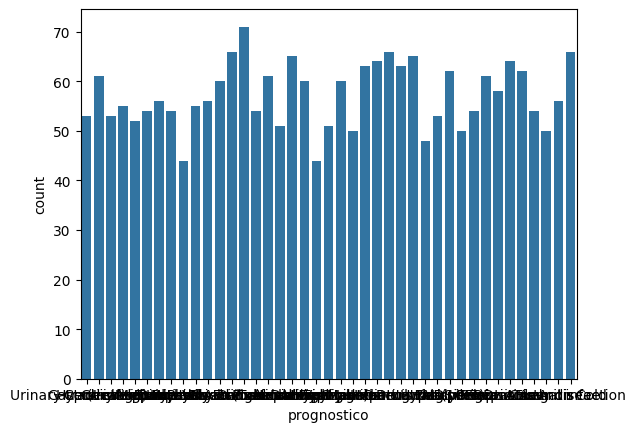

In [ ]:
display(df['prognostico'].value_counts())

# CRIA UM GRÁFICO DE BARRAS COM A FREQUÊNCIA DE CADA CLASSE
sns.countplot(x="prognostico", data=df)

# MOSTRA O GRÁFICO
plt.show()

* ### **Correlação entre os atributos**

  Por fim, geramos uma matriz de correlação para avaliar as interações entre as variáveis após as etapas de pré-processamento. O principal objetivo dessa matriz é identificar a relação entre duas ou mais variáveis, quantificando a força e a direção da correlação entre elas.




Matriz de correlação: 


,coceira,erupcao_cutanea,erupcoes_cutaneas_nodais,espirros_continuos,tremores,calafrios,dor_nas_articulacoes,dor_de_estomago,acidez,ulceras_na_lingua,...,espinhas_cheias_de_pus,cravos,escorrimento,descamacao_da_pele,poeira_prateada,pequenos_amassados_nas_unhas,unhas_inflamatorias,bolha,ferida_vermelha_ao_redor_do_nariz,exsudacao_de_crosta_amarela
coceira,1.000000,0.285492,0.334078,-0.088403,-0.061471,-0.175799,-0.167707,0.169097,-0.084945,-0.058493,...,-0.062627,-0.062627,-0.061471,-0.063197,-0.063763,-0.063763,-0.063763,-0.057262,-0.056637,-0.056006
erupcao_cutanea,0.285492,1.000000,0.306930,-0.098006,-0.068149,0.011292,0.191657,0.131120,-0.094173,-0.064847,...,0.337302,0.337302,0.330532,0.325707,0.329143,0.329143,0.329143,0.313974,0.310372,0.306730
erupcoes_cutaneas_nodais,0.334078,0.306930,1.000000,-0.035161,-0.024449,-0.069921,-0.066703,-0.031998,-0.033785,-0.023264,...,-0.024909,-0.024909,-0.024449,-0.025136,-0.025361,-0.025361,-0.025361,-0.022775,-0.022526,-0.022275
espirros_continuos,-0.088403,-0.098006,-0.035161,1.000000,0.641337,0.458841,-0.092478,-0.044363,-0.046841,-0.032254,...,-0.034534,-0.034534,-0.033897,-0.034849,-0.035161,-0.035161,-0.035161,-0.031576,-0.031231,-0.030883
tremores,-0.061471,-0.068149,-0.024449,0.641337,1.000000,0.303327,-0.064305,-0.030848,-0.032571,-0.022428,...,-0.024013,-0.024013,-0.023570,-0.024232,-0.024449,-0.024449,-0.024449,-0.021956,-0.021717,-0.021475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pequenos_amassados_nas_unhas,-0.063763,0.329143,-0.025361,-0.035161,-0.024449,-0.069921,0.357090,-0.031998,-0.033785,-0.023264,...,-0.024909,-0.024909,-0.024449,0.937638,0.946964,1.000000,0.946964,-0.022775,-0.022526,-0.022275
unhas_inflamatorias,-0.063763,0.329143,-0.025361,-0.035161,-0.024449,-0.069921,0.357090,-0.031998,-0.033785,-0.023264,...,-0.024909,-0.024909,-0.024449,0.937638,0.946964,0.946964,1.000000,-0.022775,-0.022526,-0.022275
bolha,-0.057262,0.313974,-0.022775,-0.031576,-0.021956,-0.062792,-0.059901,-0.028735,-0.030341,-0.020892,...,-0.022369,-0.022369,-0.021956,-0.022573,-0.022775,-0.022775,-0.022775,1.000000,0.923264,0.911529
ferida_vermelha_ao_redor_do_nariz,-0.056637,0.310372,-0.022526,-0.031231,-0.021717,-0.062107,-0.059248,-0.028422,-0.030009,-0.020664,...,-0.022125,-0.022125,-0.021717,-0.022326,-0.022526,-0.022526,-0.022526,0.923264,1.000000,0.899199


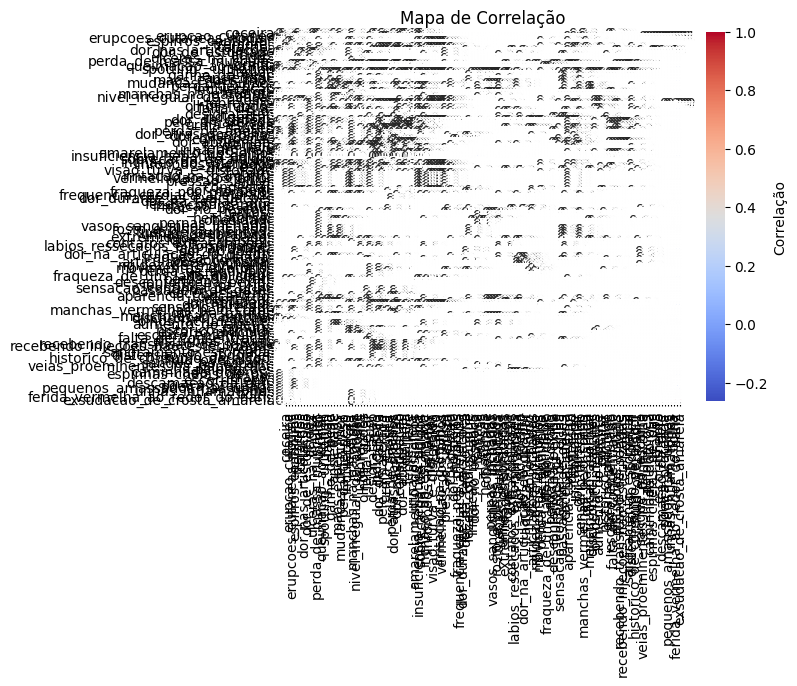

In [ ]:
# MATRIS DE CORRELAÇÃO
df_numeric = df.select_dtypes(include=[np.number])

df_correlation = df_numeric.corr()

# EXIBINDO A MATRIZ DE CORRELAÇÃO
print('\n\nMatriz de correlação: ')
display(df_correlation)

sns.heatmap(df_correlation,
            annot=True,  # para adicionar os valores na matriz
            fmt='.2f',   # formatação dos valores exibidos
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns,
            cmap='coolwarm',  # Define uma paleta de cores
            cbar_kws={'label': 'Correlação'})

plt.title('Mapa de Correlação')
plt.show()

* ### **Seleção de atributos**

  A seleção de atributos foi implementada no conjunto de dados, mas, após a análise dos resultados com a aplicação do algoritmo de aprendizado, observou-se que a taxa de acerto permaneceu muito baixa, variando entre 20% e 30%. Após realizar diversos testes e ajustes, conclui-se que a implementação da seleção de atributos não trouxe melhorias significativas no desempenho do modelo, e, portanto, decidi não utilizá-la no conjunto de dados final.
  

In [ ]:
# # IMPORTANDO BIBLIOTECAS
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# # SEPARAÇÃO DAS VARIÁVEIS INDEPENDENTES (X) E A VARIAVÉL DEPENDENTE (Y)
# X = df.drop(columns=['prognostico'])
# y = df['prognostico']

# # APLICANDO A SELEÇÃO DE ATRIBUTOS COM SelectKBest
# selector = SelectKBest(score_func=f_classif, k=30)

# X_new = selector.fit_transform(X, y)

# selected_indices = selector.get_support(indices=True)
# selected_feature_names = X.columns[selected_indices].tolist()

# # IMPRIME OS NOMES DOS ATRIBUTOS SELECIONADOS
# print(f'Atributos selecionados: {selected_feature_names}')

# # Filtra as colunas de X para manter apenas as selecionadas
# X_filtered = X[selected_feature_names]

# # Atualiza o DataFrame original df para manter apenas as colunas selecionadas
# df_filtered = df[selected_feature_names + ['prognostico']]

Atributos selecionados: ['dor_atras_dos_olhos', 'febre_leve', 'urina_amarela', 'catarro', 'irritacao_na_garganta', 'vermelhidao_dos_olhos', 'pressao_sinusal', 'coriza', 'congestao', 'frequencia_cardiaca_acelerada', 'irritacao_no_anus', 'tireoide_aumentada', 'unhas_quebradicas', 'extremidades_inchadas', 'fala_arrastada', 'fraqueza_muscular', 'perda_do_olfato', 'depressao', 'irritabilidade', 'dor_muscular', 'menstruacao_anormal', 'aumento_do_apetite', 'poliuria', 'escarro_enferrujado', 'recebendo_transfusao_de_sangue', 'recebendo_injecoes_nao_esterilizadas', 'coma', 'sangramento_estomacal', 'sangue_no_escarro', 'palpitacoes']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 36  42  45  51  52  53  54  55  62  71  72  73  77  88 101 104 105 108
 111 112 113 114 118 120] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


* ### **Salvando DataFrame alterado**

  Neste passo realizamos o salvamento do DataFrame original em seu formato (CSV) para ser usado no processo de extração padrão

In [ ]:
df.to_csv('/content/drive/My Drive/PI - 6 DSM/previsao_doencas.csv', index=False)